In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### load the data

In [4]:
df = pd.read_json("../data/raw/flats.json")
df

,681098403,688558724,687779417,681851810,688418774,688564357,687087266,688054291,687242191,688606967,...,686948639,678208235,688130364,680503387,688247382,685451375,681736449,682406566,675517453,688269548
location,"Астана, Алматы р-н","Астана, Сарыарка р-н","Астана, Есильский р-н","Астана, Алматы р-н","Астана, Сарыарка р-н","Астана, Есильский р-н","Астана, Есильский р-н","Астана, Есильский р-н","Астана, Алматы р-н","Астана, Сарыарка р-н",...,"Астана, Алматы р-н","Астана, Есильский р-н","Астана, Есильский р-н","Астана, Есильский р-н","Астана, Есильский р-н","Астана, Алматы р-н","Астана, Есильский р-н","Астана, Есильский р-н","Астана, Есильский р-н","Астана, Есильский р-н"
price,280 000 \n ...,165 000 \n ...,200 000 \n ...,300 000 \n ...,180 000 \n ...,250 000 \n ...,200 000 \n ...,250 000 \n ...,500 000 \n ...,180 000 \n ...,...,380 000 \n ...,400 000 \n ...,200 000 \n ...,250 000 \n ...,700 000 \n ...,250 000 \n ...,290 000 \n ...,200 000 \n ...,270 000 \n ...,400 000 \n ...
floor,4 из 22,10 из 10,12 из 16,9 из 21,8 из 9,6 из 8,6 из 10,3 из 9,16 из 18,5 из 5,...,8 из 9,2 из 12,5 из 16,2 из 8,7 из 9,10 из 15,NaN,4 из 9,2 из 7,8 из 16
area,55 м²,"60 м², Площадь кухни — 12 м²",40 м²,55 м²,40 м²,"56 м², Площадь кухни — 10 м²","45 м², Площадь кухни — 15 м²","78 м², Площадь кухни — 15 м²",140 м²,"44 м², Площадь кухни — 6 м²",...,60 м²,87 м²,45 м²,"40 м², Площадь кухни — 10 м²",70 м²,72 м²,69 м²,38 м²,"73 м², жилая — 56 м², Площадь кухни — 10 м²","70 м², Площадь кухни — 16 м²"
is_furnished,полностью,полностью,полностью,полностью,полностью,полностью,полностью,полностью,полностью,полностью,...,полностью,полностью,полностью,полностью,полностью,частично,полностью,полностью,NaN,частично


In [5]:
df = df.T
df = df.reset_index()
df

,index,location,price,floor,area,is_furnished
0,681098403,"Астана, Алматы р-н",280 000 \n ...,4 из 22,55 м²,полностью
1,688558724,"Астана, Сарыарка р-н",165 000 \n ...,10 из 10,"60 м², Площадь кухни — 12 м²",полностью
2,687779417,"Астана, Есильский р-н",200 000 \n ...,12 из 16,40 м²,полностью
3,681851810,"Астана, Алматы р-н",300 000 \n ...,9 из 21,55 м²,полностью
4,688418774,"Астана, Сарыарка р-н",180 000 \n ...,8 из 9,40 м²,полностью
...,...,...,...,...,...,...
4227,685451375,"Астана, Алматы р-н",250 000 \n ...,10 из 15,72 м²,частично
4228,681736449,"Астана, Есильский р-н",290 000 \n ...,NaN,69 м²,полностью
4229,682406566,"Астана, Есильский р-н",200 000 \n ...,4 из 9,38 м²,полностью
4230,675517453,"Астана, Есильский р-н",270 000 \n ...,2 из 7,"73 м², жилая — 56 м², Площадь кухни — 10 м²",NaN


In [6]:
df_add = pd.read_csv("../data/raw/results.csv")
df["rooms"] = df_add.Field.apply(lambda x: x[:1])
df

,index,location,price,floor,area,is_furnished,rooms
0,681098403,"Астана, Алматы р-н",280 000 \n ...,4 из 22,55 м²,полностью,2
1,688558724,"Астана, Сарыарка р-н",165 000 \n ...,10 из 10,"60 м², Площадь кухни — 12 м²",полностью,2
2,687779417,"Астана, Есильский р-н",200 000 \n ...,12 из 16,40 м²,полностью,1
3,681851810,"Астана, Алматы р-н",300 000 \n ...,9 из 21,55 м²,полностью,2
4,688418774,"Астана, Сарыарка р-н",180 000 \n ...,8 из 9,40 м²,полностью,1
...,...,...,...,...,...,...,...
4227,685451375,"Астана, Алматы р-н",250 000 \n ...,10 из 15,72 м²,частично,4
4228,681736449,"Астана, Есильский р-н",290 000 \n ...,NaN,69 м²,полностью,5
4229,682406566,"Астана, Есильский р-н",200 000 \n ...,4 из 9,38 м²,полностью,3
4230,675517453,"Астана, Есильский р-н",270 000 \n ...,2 из 7,"73 м², жилая — 56 м², Площадь кухни — 10 м²",NaN,3


### looks like we should process it

In [7]:
df.location.unique()

array(['Астана, Алматы р-н', 'Астана, Сарыарка р-н',
       'Астана, Есильский р-н', 'Астана, р-н Байконур',
       'Астана, Нура р-н', 'Астана'], dtype=object)

In [8]:
df.is_furnished.unique()

array(['полностью', nan, 'частично', 'без мебели'], dtype=object)

In [9]:
df.iloc[133]

index                                                   687666663
location                                     Астана, Сарыарка р-н
price           650 000 \n                                    ...
floor                                                    23 из 37
area                                310 м², Площадь кухни — 35 м²
is_furnished                                            полностью
rooms                                                           1
Name: 133, dtype: object

In [10]:
def process_location(text: str) -> str:
    text = text.replace("р-н", "")
    text = text.split()
    if len(text) <= 1:
        return text[0]
    else:
        return text[1]
    

def process_price(text: str) -> int:
    if text:
        cleaned_text = text.split('\n')[0].replace(" ", "").replace("\xa0", "")
        return int(cleaned_text)
    

def process_area(text: str) -> str:
    if text:
        text = text.split()
        return text[0]


def process_floor(text: str) -> str:
    if isinstance(text, str):
        text = text.split()
        return text[0]

In [11]:
df.location = df.location.apply(process_location)
df.price = df.price.apply(process_price)
df.area = df.area.apply(process_area)
df.floor = df.floor.apply(process_floor)
df

,index,location,price,floor,area,is_furnished,rooms
0,681098403,Алматы,280000,4,55,полностью,2
1,688558724,Сарыарка,165000,10,60,полностью,2
2,687779417,Есильский,200000,12,40,полностью,1
3,681851810,Алматы,300000,9,55,полностью,2
4,688418774,Сарыарка,180000,8,40,полностью,1
...,...,...,...,...,...,...,...
4227,685451375,Алматы,250000,10,72,частично,4
4228,681736449,Есильский,290000,None,69,полностью,5
4229,682406566,Есильский,200000,4,38,полностью,3
4230,675517453,Есильский,270000,2,73,NaN,3


In [12]:
df.isna().sum()

index             0
location          0
price             0
floor           208
area              0
is_furnished    933
rooms             0
dtype: int64

In [13]:
df.is_furnished.value_counts()

полностью     2957
частично       275
без мебели      67
Name: is_furnished, dtype: int64

In [14]:
df.is_furnished = df.is_furnished.fillna("полностью")

In [15]:
df.isna().sum()

index             0
location          0
price             0
floor           208
area              0
is_furnished      0
rooms             0
dtype: int64

<AxesSubplot: >

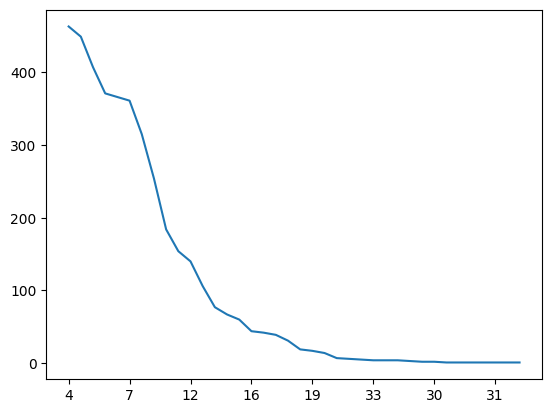

In [16]:
df.floor.value_counts().plot()

In [17]:
df.floor.value_counts()[20:]

19    17
22    14
24     7
23     6
28     5
33     4
27     4
25     4
26     3
29     2
30     2
41     1
32     1
36     1
35     1
31     1
37     1
88     1
Name: floor, dtype: int64

In [18]:
df[df.floor=='88']

,index,location,price,floor,area,is_furnished,rooms
3583,688482789,Есильский,200000,88,59,полностью,2


the tallest building in Astana has 54 floors, looks like it's just a misprint

In [19]:
df.loc[3583, 'floor'] = 8

In [20]:
df[df.floor=='37']

,index,location,price,floor,area,is_furnished,rooms
2808,30509781,Сарыарка,1500000,37,305,полностью,3


In [21]:
df[df.floor=='37'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 2808 to 2808
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         1 non-null      int64 
 1   location      1 non-null      object
 2   price         1 non-null      int64 
 3   floor         1 non-null      object
 4   area          1 non-null      object
 5   is_furnished  1 non-null      object
 6   rooms         1 non-null      object
dtypes: int64(2), object(5)
memory usage: 64.0+ bytes


In [22]:
df

,index,location,price,floor,area,is_furnished,rooms
0,681098403,Алматы,280000,4,55,полностью,2
1,688558724,Сарыарка,165000,10,60,полностью,2
2,687779417,Есильский,200000,12,40,полностью,1
3,681851810,Алматы,300000,9,55,полностью,2
4,688418774,Сарыарка,180000,8,40,полностью,1
...,...,...,...,...,...,...,...
4227,685451375,Алматы,250000,10,72,частично,4
4228,681736449,Есильский,290000,None,69,полностью,5
4229,682406566,Есильский,200000,4,38,полностью,3
4230,675517453,Есильский,270000,2,73,полностью,3


In [23]:
df.loc[4228]

index           681736449
location        Есильский
price              290000
floor                None
area                   69
is_furnished    полностью
rooms                   5
Name: 4228, dtype: object

In [24]:
df['floor'] = pd.to_numeric(df['floor'], errors='coerce')

In [25]:
mean_floor = df['floor'].mean()
df['floor'] = df['floor'].fillna(mean_floor)
df['floor'] = df['floor'].astype(int)
df['area'] = df['area'].astype(float)
df['rooms'] = df['rooms'].astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232 entries, 0 to 4231
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         4232 non-null   int64  
 1   location      4232 non-null   object 
 2   price         4232 non-null   int64  
 3   floor         4232 non-null   int64  
 4   area          4232 non-null   float64
 5   is_furnished  4232 non-null   object 
 6   rooms         4232 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 231.6+ KB


In [27]:
df.isna().sum()

index           0
location        0
price           0
floor           0
area            0
is_furnished    0
rooms           0
dtype: int64

In [28]:
df.to_csv("../data/astana.csv", index=False)

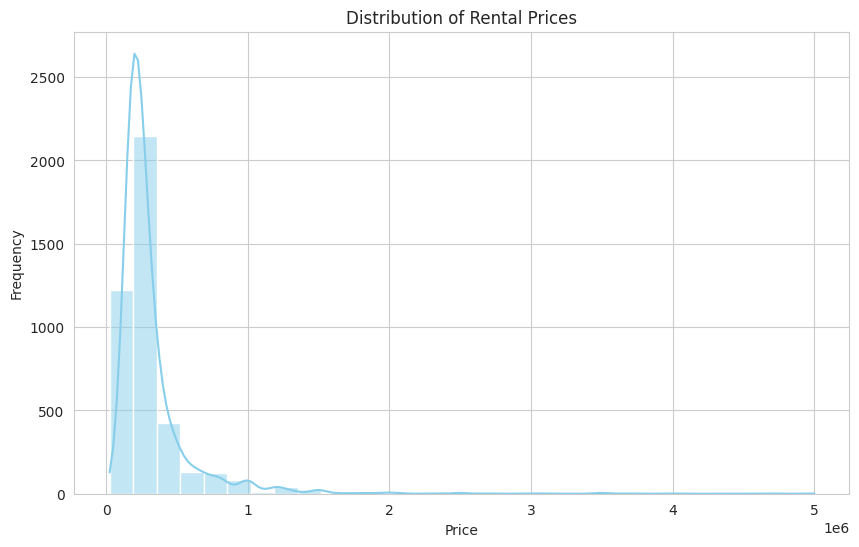

In [29]:
# Set the style for the plots
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Rental Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

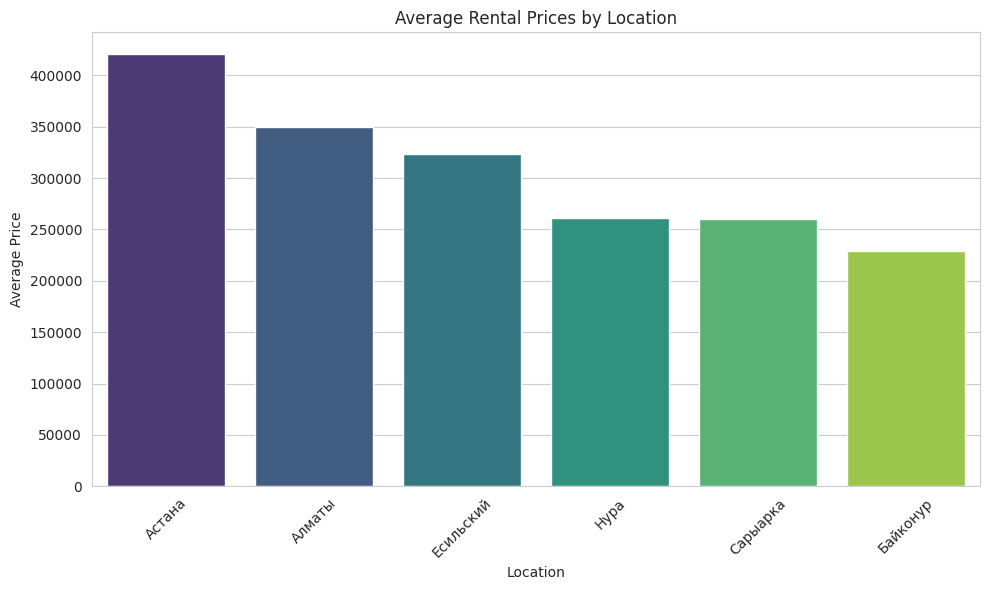

In [30]:
plt.figure(figsize=(10, 6))
avg_prices_location = df.groupby('location')['price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_prices_location.index, y=avg_prices_location.values, palette='viridis')
plt.title('Average Rental Prices by Location')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

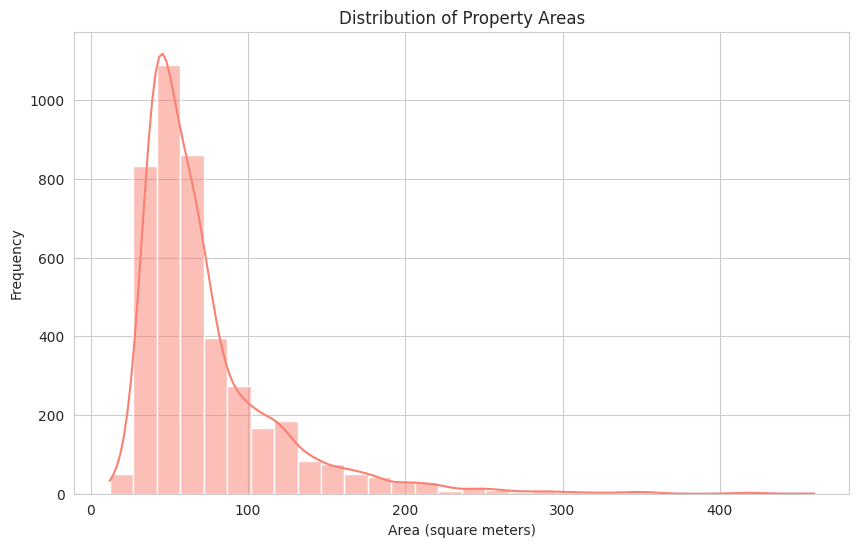

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['area'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Property Areas')
plt.xlabel('Area (square meters)')
plt.ylabel('Frequency')
plt.show()

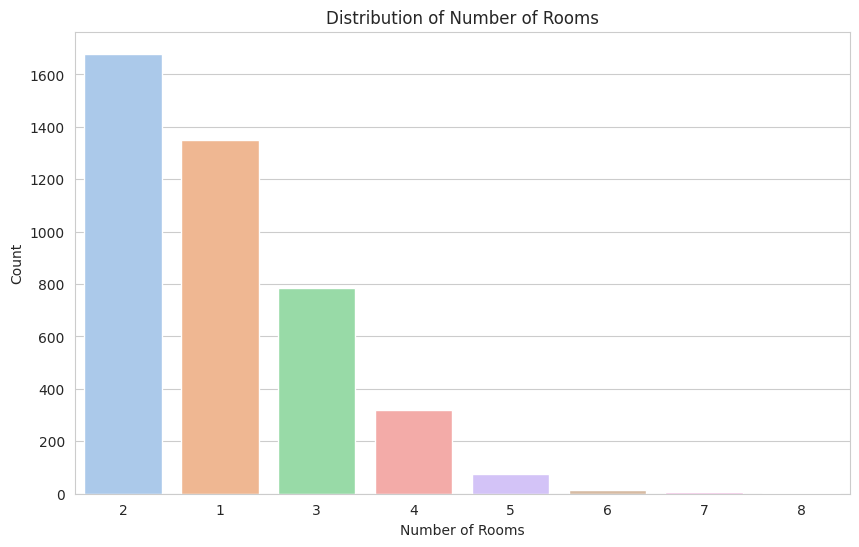

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rooms', palette='pastel', order=df['rooms'].value_counts().index)
plt.title('Distribution of Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Count')
plt.show()

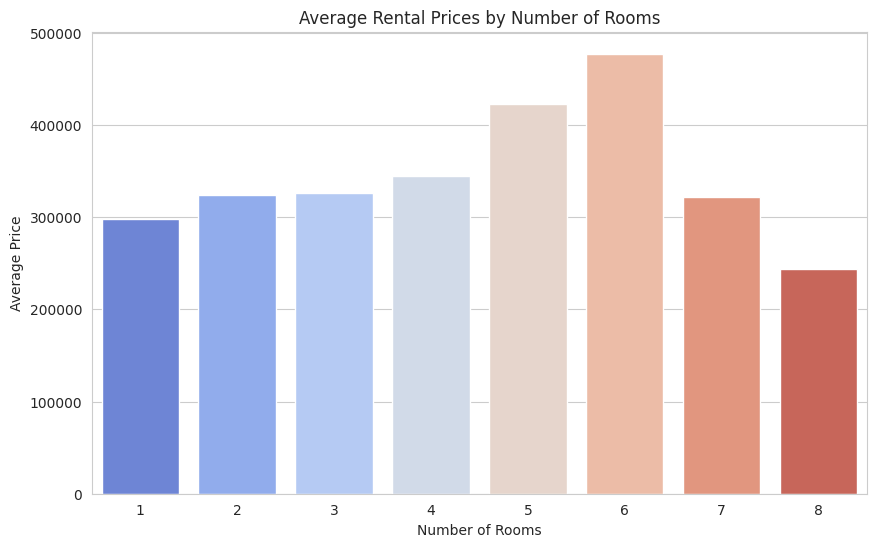

In [33]:
plt.figure(figsize=(10, 6))
avg_prices_rooms = df.groupby('rooms')['price'].mean()
sns.barplot(x=avg_prices_rooms.index, y=avg_prices_rooms.values, palette='coolwarm')
plt.title('Average Rental Prices by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Average Price')
plt.show()

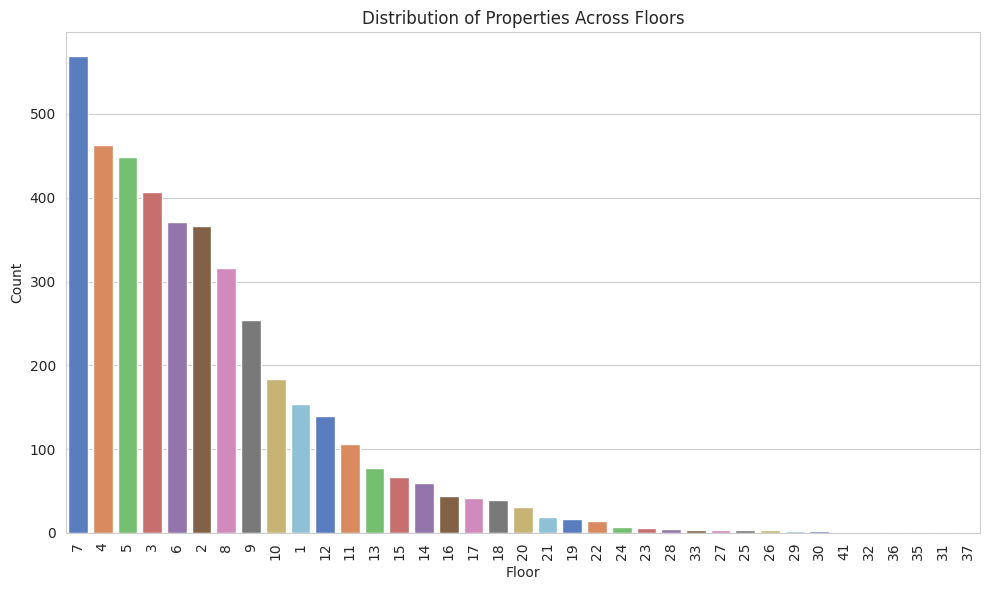

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='floor', palette='muted', order=df['floor'].value_counts().index)
plt.title('Distribution of Properties Across Floors')
plt.xlabel('Floor')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

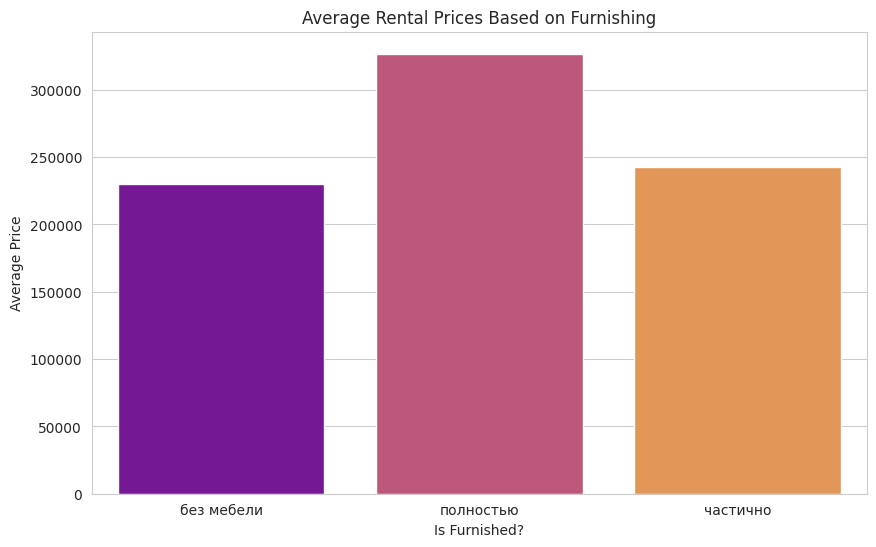

In [35]:
plt.figure(figsize=(10, 6))
avg_prices_furnished = df.groupby('is_furnished')['price'].mean()
sns.barplot(x=avg_prices_furnished.index, y=avg_prices_furnished.values, palette='plasma')
plt.title('Average Rental Prices Based on Furnishing')
plt.xlabel('Is Furnished?')
plt.ylabel('Average Price')
plt.show()

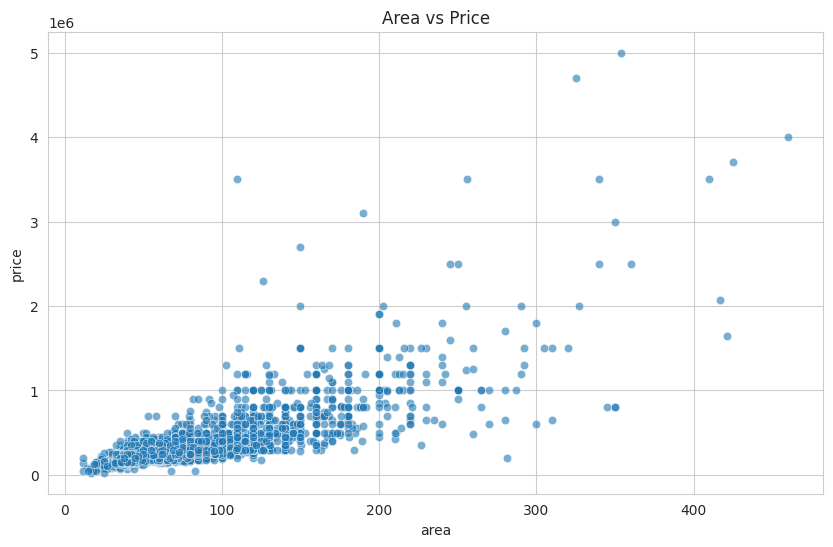

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="area", y="price", alpha=0.6)
plt.title('Area vs Price')
plt.show()

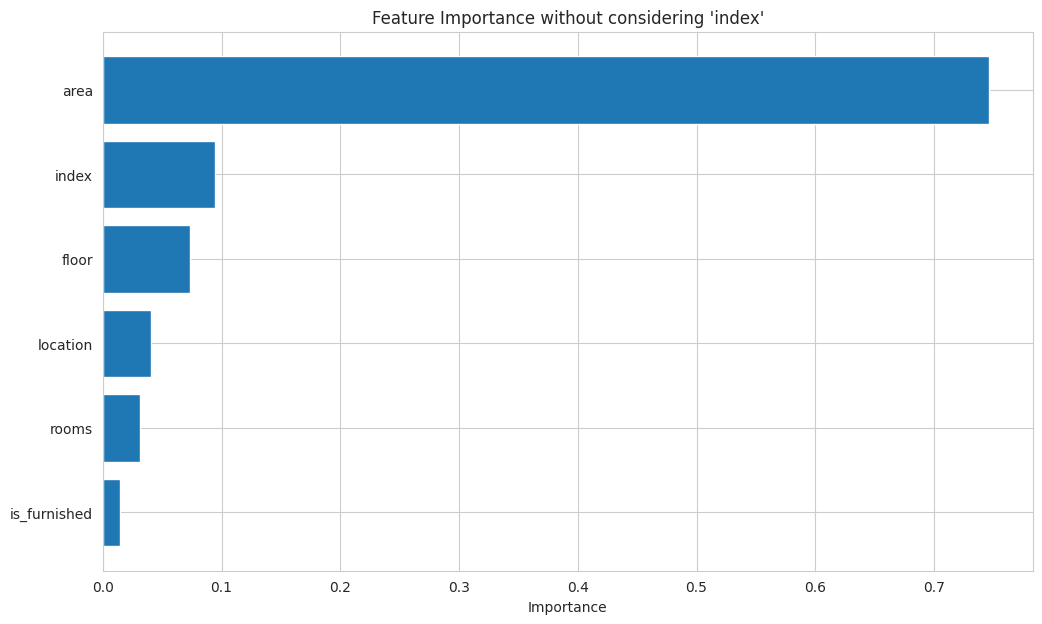

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Encode the categorical columns
X = df.drop(["price"], axis=1)

label_encoders = {}
for col in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

y = df["price"]

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importances = rf.feature_importances_
features = X.columns

sorted_idx = feature_importances.argsort()

plt.figure(figsize=(12, 7))
plt.barh(features[sorted_idx], feature_importances[sorted_idx], align='center')
plt.xlabel("Importance")
plt.title("Feature Importance without considering 'index'")
plt.show()


The Feature Importance chart provides insights into which features are most influential in determining the price of a property:
- `area`: The total area of the property is the most important predictor of the price. This aligns with the general real estate principle that larger properties are often more expensive.
- `rooms`: The number of rooms also has a significant influence on the price.
- `floor`: The floor on which the property is located plays a role, though it's less significant than area and number of rooms.
- `location`: The location, represented as a one-hot encoded categorical variable, also impacts the price, but its individual categories might have varying degrees of influence.

The `is_furnished` feature seems to have less predictive power compared to others in determining the price.